## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


## Importing the dataset and Data Preprocessing


In [ ]:
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('heart_disease.csv')
X = dataset.iloc[:, 1:12].values
# print(X)
y = dataset.iloc[:, -1].values
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
print(X_scaled)

[[-0.43606151  1.36405487  0.44345206 ... -0.31087913 -0.23838436
   0.49416711]
 [ 0.30768633 -0.73310834 -1.01816804 ... -0.31087913 -0.23838436
   0.49416711]
 [-0.24799666 -0.73310834  0.07804703 ... -0.31087913 -0.23838436
  -2.02360695]
 ...
 [-0.16328642  1.36405487  2.27047718 ... -0.31087913  4.19490608
  -2.02360695]
 [ 1.20058905 -0.73310834 -0.16555632 ... -0.31087913 -0.23838436
  -2.02360695]
 [ 0.43414373 -0.73310834  0.68705541 ... -0.31087913 -0.23838436
   0.49416711]]


In [ ]:
# print(X)
# print(dataset.columns!='id')
# print(list(dataset.columns))

values= []
for i in dataset.columns:
    if(i!='id'):
        values.append(i)

print(values)


['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'disease']


In [ ]:
print(y)

# correlation btwn attributes
# +ve  => directly proportional => 
# -ve => inversely proportional

[0 1 1 ... 1 1 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


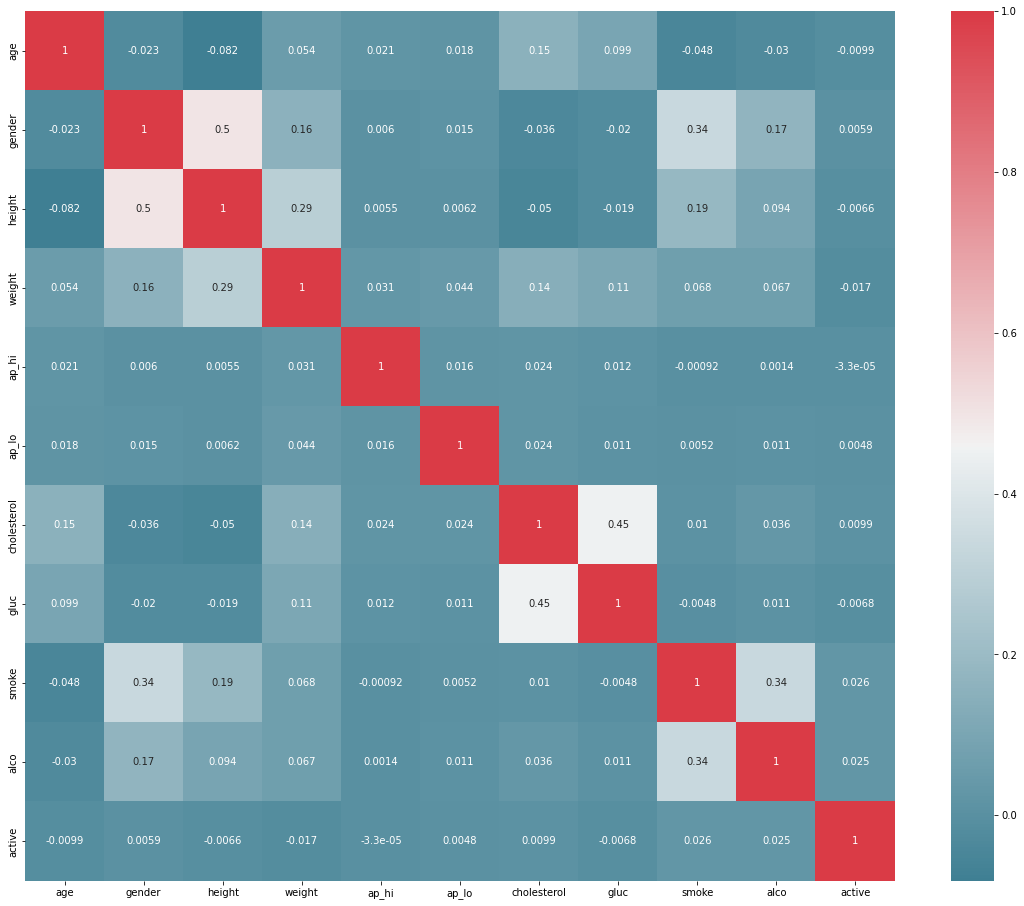

In [ ]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(20, 16))
corr = dataset.iloc[:, 1:12].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

plt.show()

In [ ]:
# selected_columns = dataset[:,dataset.columns!='disease']
columns = np.full((corr.shape[0],), True, dtype=bool)
selected_columns = dataset.iloc[:, 1:12].columns[columns].values
# selected_columns = selected_columns[X.columns!='disease'].values

import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(dataset.iloc[:, 1:12].iloc[:,1:].values, dataset.iloc[:, 1:12].iloc[:,0].values, SL, selected_columns)

print(selected_columns)

['age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol' 'gluc'
 'smoke' 'alco' 'active']


In [ ]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  disease      70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
dataset.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
disease        0
dtype: int64

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

## Training the Random Forest Regression model on the whole dataset

In [ ]:
RFClassifier = RandomForestClassifier()

RFClassifier.fit(X_train, y_train)

y_pred = RFClassifier.predict(X_test)

In [ ]:
# Confusion Matrix
RFConfusionMatrx = confusion_matrix(y_test, y_pred)
print(RFConfusionMatrx)

[[6315 2373]
 [2617 6195]]


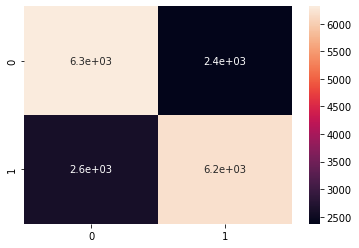

In [ ]:
sns.heatmap(RFConfusionMatrx, annot=True)

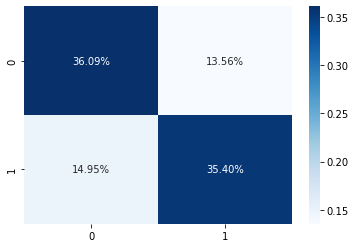

In [ ]:
sns.heatmap(RFConfusionMatrx/np.sum(RFConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# Accuracy
RFAccuracyScore = accuracy_score(y_test, y_pred) 
print(RFAccuracyScore)

0.7148571428571429


In [ ]:
# Recall
RFRecallScore = recall_score(y_test, y_pred, average=None) 
print(RFRecallScore)

[0.72686464 0.70301861]


In [ ]:
# Precision
RFPrecisionScore = precision_score(y_test, y_pred, average=None)
print(RFPrecisionScore)

[0.70700851 0.72303922]


In [ ]:
#F1 score
RFF1Score = f1_score(y_test, y_pred, average=None)
print(RFF1Score)

[0.71679909 0.71288838]


## Training the Logistic Regression model on the whole dataset

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
print(y_pred)

[1 1 1 ... 0 0 1]


In [ ]:
# Confusion Matrix
LRConfusionMatrx = confusion_matrix(y_test, y_pred)
print(LRConfusionMatrx)

[[6631 2057]
 [2848 5964]]


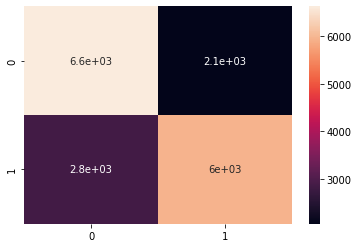

In [ ]:
sns.heatmap(LRConfusionMatrx, annot=True)

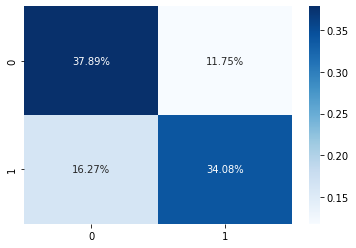

In [ ]:
sns.heatmap(LRConfusionMatrx/np.sum(LRConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# Accuracy
LRAccuracyScore = accuracy_score(y_test, y_pred) 
print(LRAccuracyScore)

0.7197142857142858


In [ ]:
# Recall
LRRecallScore = recall_score(y_test, y_pred, average=None) 
print(LRRecallScore)

[0.76323665 0.67680436]


In [ ]:
# Precision
LRPrecisionScore = precision_score(y_test, y_pred, average=None)
print(LRPrecisionScore)

[0.69954637 0.74354819]


In [ ]:
#F1 score
LRF1Score = f1_score(y_test, y_pred, average=None)
print(LRF1Score)

[0.73000495 0.70860809]


## Training the SVM model on the whole dataset

In [ ]:
# import the class
from sklearn.svm import LinearSVC

# instantiate the model (using the default parameters)
Svm = LinearSVC(max_iter=2000)

# fit the model with data
Svm.fit(X_train,y_train)

#
y_pred=Svm.predict(X_test)
print(y_pred)

[1 1 1 ... 0 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Confusion Matrix
SvmConfusionMatrx = confusion_matrix(y_test, y_pred)
print(SvmConfusionMatrx)

[[6095 2593]
 [3280 5532]]


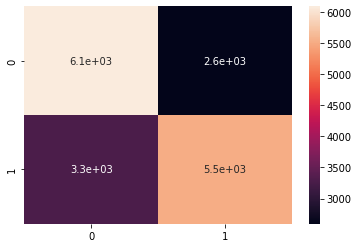

In [ ]:
sns.heatmap(SvmConfusionMatrx, annot=True)

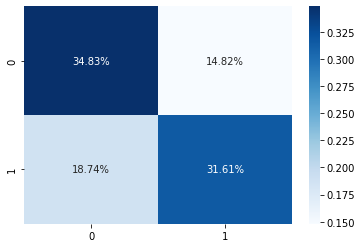

In [ ]:
sns.heatmap(SvmConfusionMatrx/np.sum(SvmConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# Accuracy
SvmAccuracyScore = accuracy_score(y_test, y_pred) 
print(SvmAccuracyScore)

0.6644


In [ ]:
# Recall
SvmRecallScore = recall_score(y_test, y_pred, average=None) 
print(SvmRecallScore)

[0.70154236 0.6277803 ]


In [ ]:
# Precision
SvmPrecisionScore = precision_score(y_test, y_pred, average=None)
print(SvmPrecisionScore)

[0.65013333 0.68086154]


In [ ]:
#F1 score
Svmf1Score = f1_score(y_test, y_pred, average=None)
print(Svmf1Score)

[0.67486021 0.65324438]


## Training the KNN model on the whole dataset

In [ ]:
# instantiate the model (using the default parameters)
KNN = KNeighborsClassifier()

# fit the model with data
KNN.fit(X_train,y_train)

#
y_pred=KNN.predict(X_test)
print(y_pred)

[1 1 0 ... 0 0 0]


In [ ]:
# Confusion Matrix
KNNConfusionMatrx = confusion_matrix(y_test, y_pred)
print(KNNConfusionMatrx)

[[5774 2914]
 [3187 5625]]


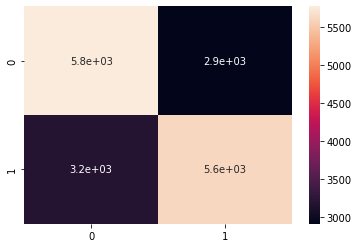

In [ ]:
sns.heatmap(KNNConfusionMatrx, annot=True)

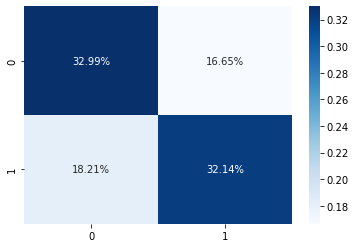

In [ ]:
sns.heatmap(KNNConfusionMatrx/np.sum(KNNConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# Accuracy
KNNAccuracyScore = accuracy_score(y_test, y_pred) 
print(KNNAccuracyScore)

0.6513714285714286


In [ ]:
# Recall
KNNRecallScore = recall_score(y_test, y_pred, average=None) 
print(KNNRecallScore)

[0.66459484 0.63833409]


In [ ]:
# Precision
KNNPrecisionScore = precision_score(y_test, y_pred, average=None)
print(KNNPrecisionScore)

[0.64434773 0.65874224]


In [ ]:
#F1 score
KNNF1Score = f1_score(y_test, y_pred, average=None)
print(KNNF1Score)

[0.65431469 0.64837762]


## Training the Decision Tree model on the whole dataset

In [ ]:
# instantiate the model (using the default parameters)
DT = DecisionTreeClassifier()

# fit the model with data
DT.fit(X_train,y_train)

#
y_pred=DT.predict(X_test)
print(y_pred)

[1 1 1 ... 1 0 1]


In [ ]:
from sklearn import tree

# text_representation = tree.export_text(DT)
# print(text_representation)

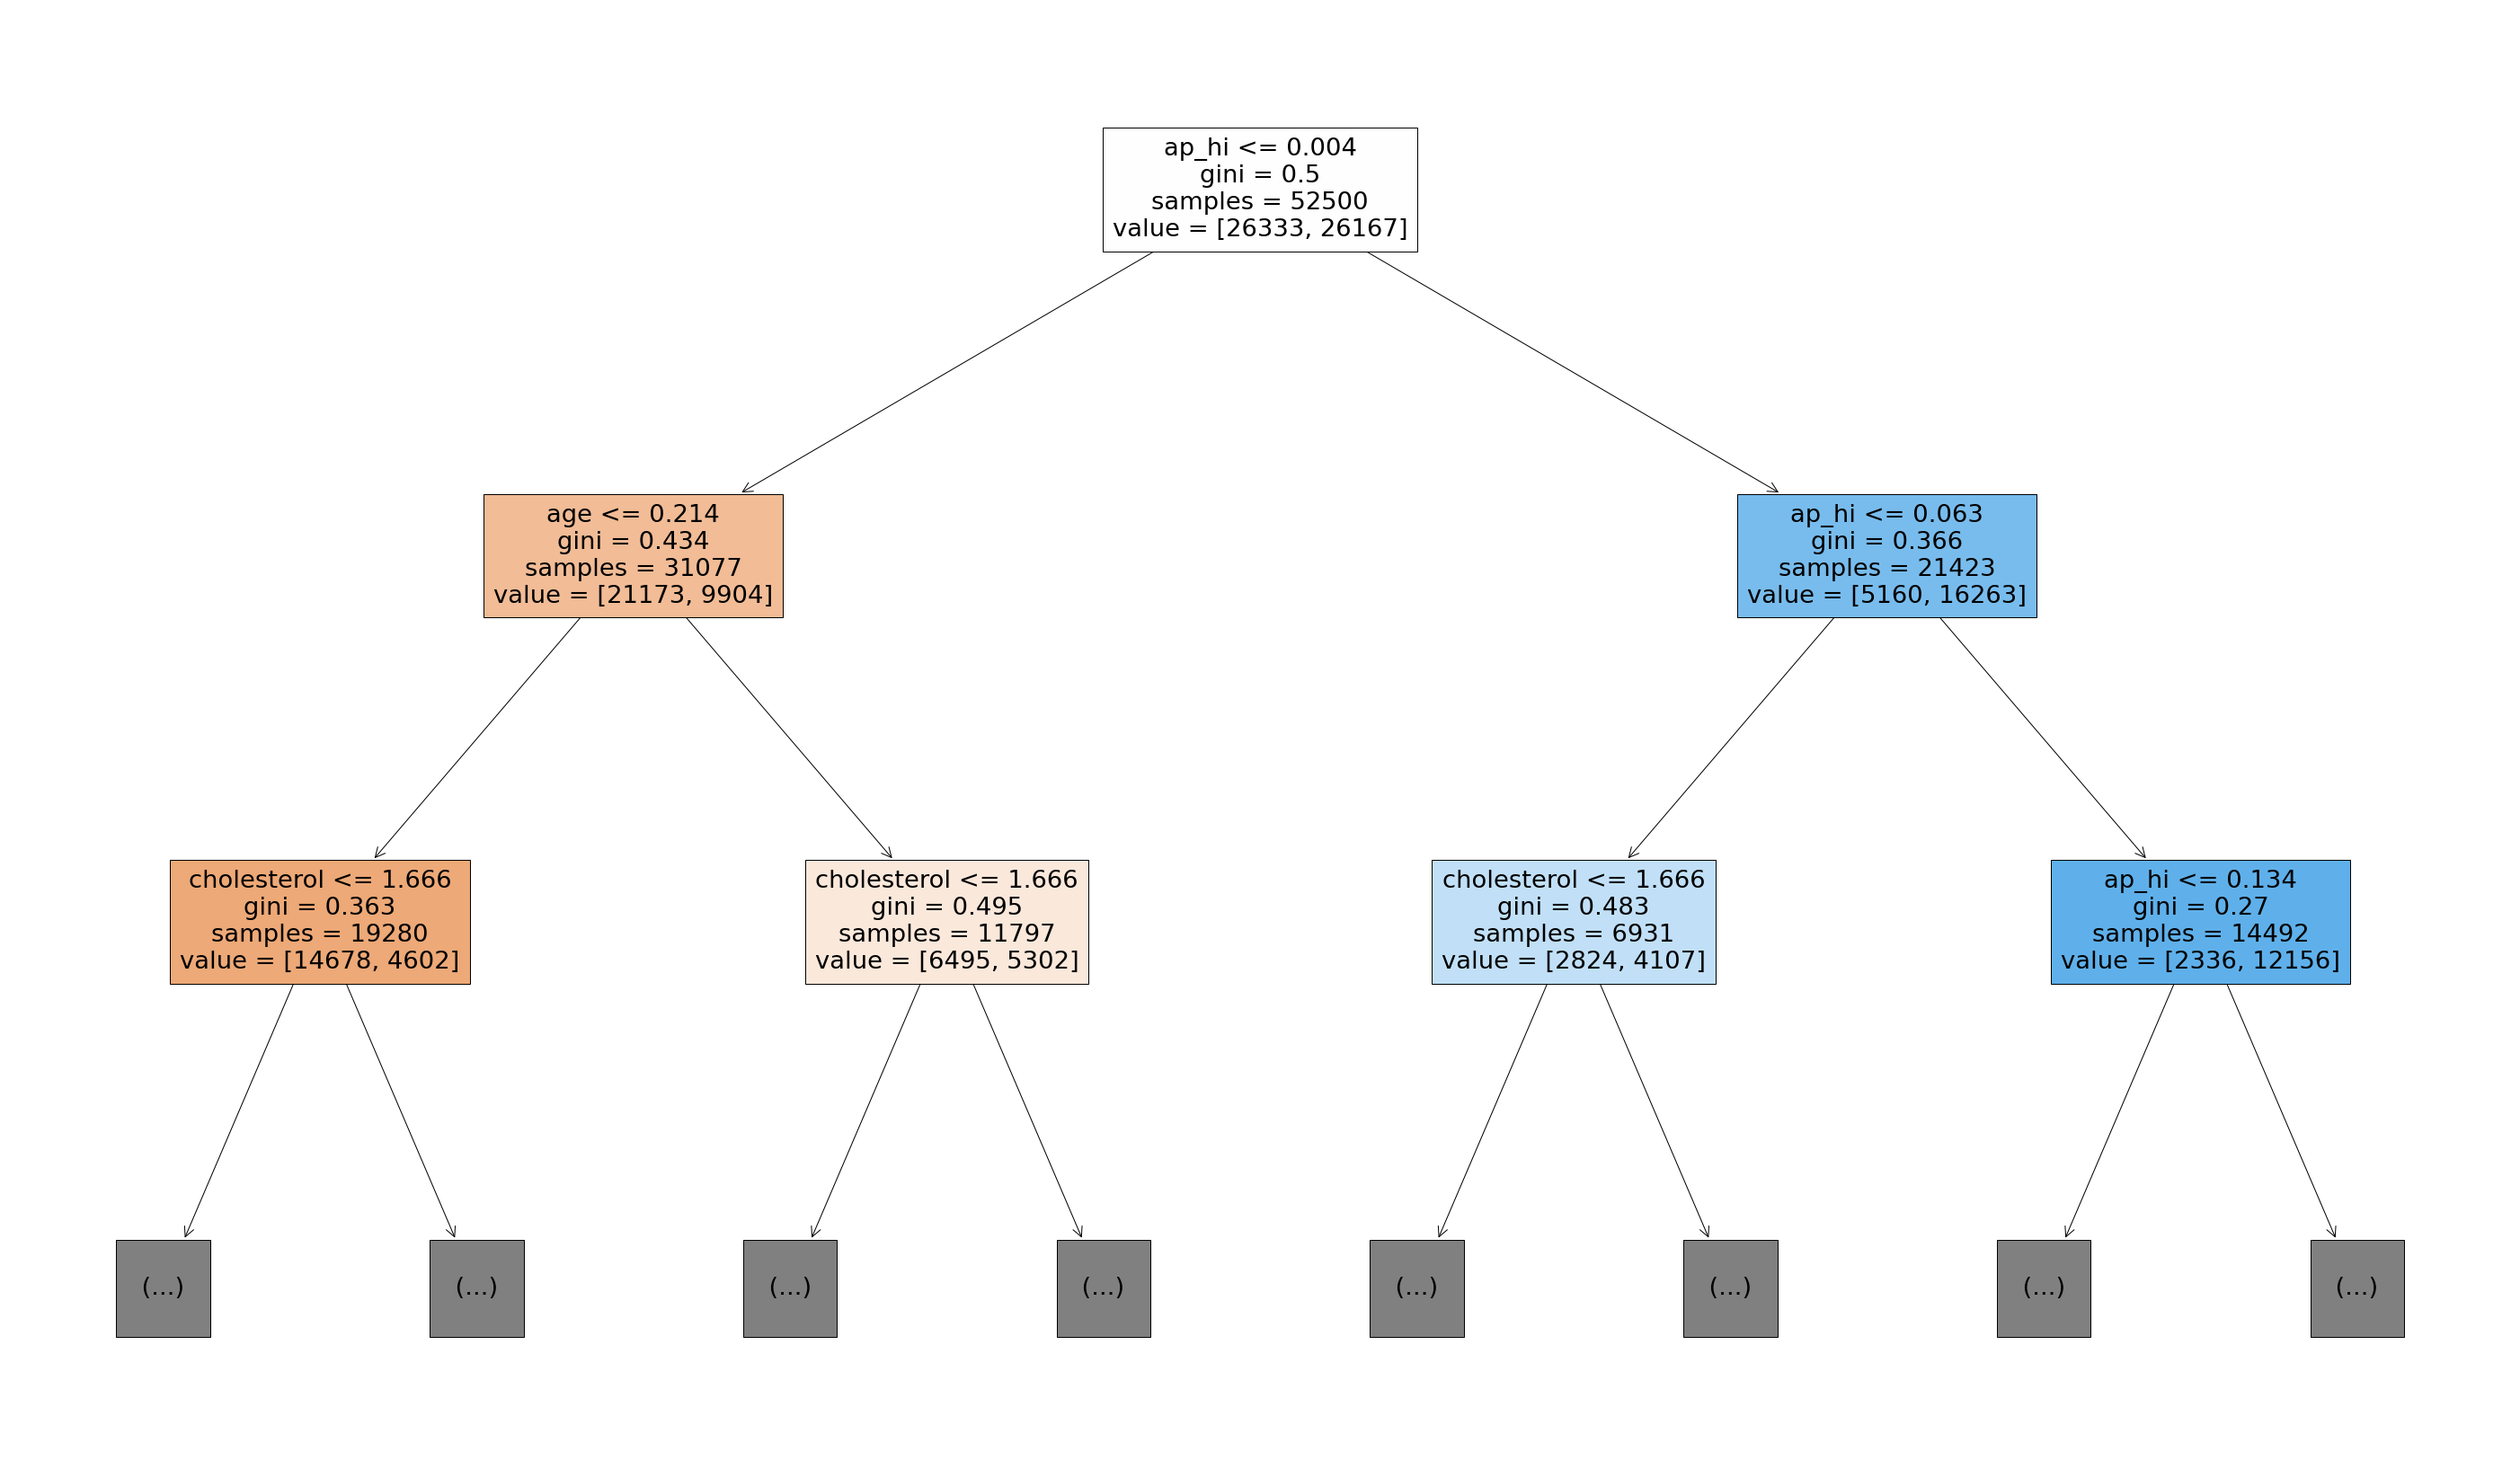

In [ ]:
# fig = plt.figure(figsize=(100,50))
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(DT, 
                   feature_names=values,
                   max_depth=2,
                   filled=True)
# print(DT.classes_)

In [ ]:
# Confusion Matrix
DTConfusionMatrx = confusion_matrix(y_test, y_pred)
print(DTConfusionMatrx)

[[5574 3114]
 [3218 5594]]


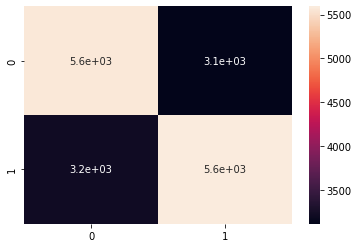

In [ ]:
sns.heatmap(DTConfusionMatrx, annot=True)

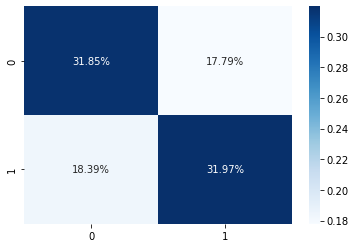

In [ ]:
sns.heatmap(DTConfusionMatrx/np.sum(DTConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# Accuracy
DTAccuracyScore = accuracy_score(y_test, y_pred) 
print(DTAccuracyScore)

0.6381714285714286


In [ ]:
# Recall
DTRecallScore = recall_score(y_test, y_pred, average=None) 
print(DTRecallScore)

[0.64157459 0.63481616]


In [ ]:
# Precision
DTPrecisionScore = precision_score(y_test, y_pred, average=None)
print(DTPrecisionScore)

[0.63398544 0.6423978 ]


In [ ]:
#F1 score
DTF1Score = f1_score(y_test, y_pred, average=None)
print(DTF1Score)

[0.63775744 0.63858447]


## Training the Naive Bayes model on the whole dataset

In [ ]:
# instantiate the model (using the default parameters)
NaiveBayes = GaussianNB()

# fit the model with data
NaiveBayes.fit(X_train,y_train)

#
y_pred=NaiveBayes.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Confusion Matrix
NaiveBayesConfusionMatrx = confusion_matrix(y_test, y_pred)
print(NaiveBayesConfusionMatrx)

[[7566 1122]
 [5986 2826]]


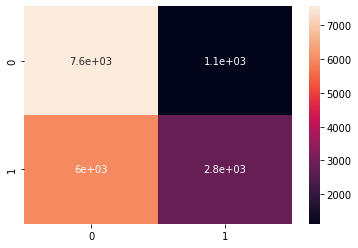

In [ ]:
sns.heatmap(NaiveBayesConfusionMatrx, annot=True)

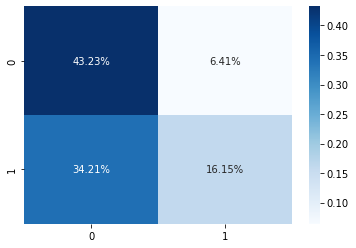

In [ ]:
sns.heatmap(NaiveBayesConfusionMatrx/np.sum(NaiveBayesConfusionMatrx), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# Accuracy
NaiveBayesAccuracyScore = accuracy_score(y_test, y_pred) 
print(NaiveBayesAccuracyScore)

0.5938285714285715


In [ ]:
# Recall
NaiveBayesRecallScore = recall_score(y_test, y_pred, average=None) 
print(NaiveBayesRecallScore)

[0.87085635 0.32069905]


In [ ]:
# Precision
NaiveBayesPrecisionScore = precision_score(y_test, y_pred, average=None)
print(NaiveBayesPrecisionScore)

[0.55829398 0.71580547]


In [ ]:
#F1 score
NaiveBayesf1Score = f1_score(y_test, y_pred, average=None)
print(NaiveBayesf1Score)

[0.68039568 0.44294671]


## Comparing evaluation Metrics

In [ ]:
!pip -vvv install prettytable

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

In [ ]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Regression Model", "accuracy_score", "recall_score",  "precision_score","f1_score"])
  
# Add rows
myTable.add_row(["LR", LRAccuracyScore, LRRecallScore[1], LRPrecisionScore[1], LRF1Score[1] ])
myTable.add_row(["RF", RFAccuracyScore, RFRecallScore[1], RFPrecisionScore[1], RFF1Score[1] ])
myTable.add_row(["SVM", SvmAccuracyScore, SvmRecallScore[1], SvmPrecisionScore[1], Svmf1Score[1] ])
myTable.add_row(["KNN", KNNAccuracyScore, KNNRecallScore[1], KNNPrecisionScore[1], KNNF1Score[1] ])
myTable.add_row(["DT", DTAccuracyScore, DTRecallScore[1], DTPrecisionScore[1], DTF1Score[1] ])
myTable.add_row(["NB", NaiveBayesAccuracyScore, NaiveBayesRecallScore[1], NaiveBayesPrecisionScore[1], NaiveBayesf1Score[1] ])

print(myTable)

+------------------+--------------------+--------------------+--------------------+---------------------+
| Regression Model |   accuracy_score   |    recall_score    |  precision_score   |       f1_score      |
+------------------+--------------------+--------------------+--------------------+---------------------+
|        LR        | 0.7197142857142858 | 0.6768043576940536 | 0.7435481860117192 |  0.7086080912493318 |
|        RF        | 0.7148571428571429 | 0.7030186109850204 | 0.7230392156862745 |  0.7128883774453394 |
|       SVM        |       0.6644       | 0.6277802995914662 | 0.6808615384615384 |  0.6532443762177481 |
|       KNN        | 0.6513714285714286 | 0.6383340898774399 | 0.658742241480267  |  0.6483776151230477 |
|        DT        | 0.6381714285714286 | 0.6348161597821153 | 0.6423977951309141 |  0.6385844748858448 |
|        NB        | 0.5938285714285715 | 0.3206990467544258 |  0.71580547112462  | 0.44294670846394985 |
+------------------+--------------------+-----

# Data Visualisation

In [ ]:
male = 0
female = 0
for i in range(0,len(X[:, 1])):
  if (X[:, 1][i] == 1 and y[i]==1):
    female += 1
  elif (X[:, 1][i] == 2 and y[i]==1):
    male += 1
print(male)
print(female)
# print(X[:,1][0])

12363
22616


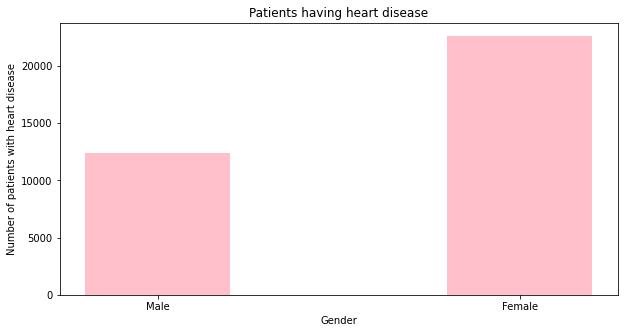

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Male':male, 'Female':female}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='pink',
		width = 0.4)

plt.xlabel("Gender")
plt.ylabel("Number of patients with heart disease")
plt.title("Patients having heart disease")
plt.show()


In [ ]:
smokers = 0
nonSmokers= 0
for i in range(0,len(X[:, 8])):
  if (X[:, 8][i] == 1 and y[i]==1):
    smokers += 1
  elif (X[:, 8][i] == 0 and y[i]==1):
    nonSmokers += 1
print(smokers)
print(nonSmokers)
# print(X[:,1][0])

2929
32050


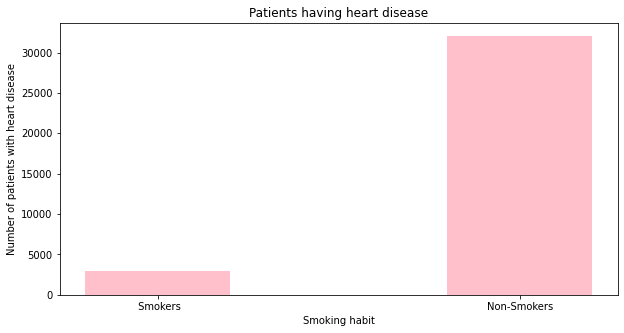

In [ ]:
# creating the dataset
data = {' Smokers':smokers, 'Non-Smokers':nonSmokers}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='pink',
		width = 0.4)

plt.xlabel("Smoking habit")
plt.ylabel("Number of patients with heart disease")
plt.title("Patients having heart disease")
plt.show()


# Compiling the Results

In [ ]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(max_iter=2000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
print(models)

{'Logistic Regression': LogisticRegression(), 'Support Vector Machines': LinearSVC(max_iter=2000), 'Decision Trees': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Naive Bayes': GaussianNB(), 'K-Nearest Neighbor': KNeighborsClassifier()}


In [ ]:
accuracy, precision, recall, f1= {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1.values()

df_model.sort_values(by='Accuracy',ascending=False).style.background_gradient('twilight')

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.719714,0.676804,0.743548,0.708608
Random Forest,0.713429,0.702338,0.721245,0.711666
Support Vector Machines,0.664686,0.627894,0.681236,0.653478
K-Nearest Neighbor,0.651371,0.638334,0.658742,0.648378
Decision Trees,0.633029,0.631185,0.636822,0.633991
Naive Bayes,0.593829,0.320699,0.715805,0.442947
